In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/placement (1).csv")

In [6]:
df.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package in lpa')

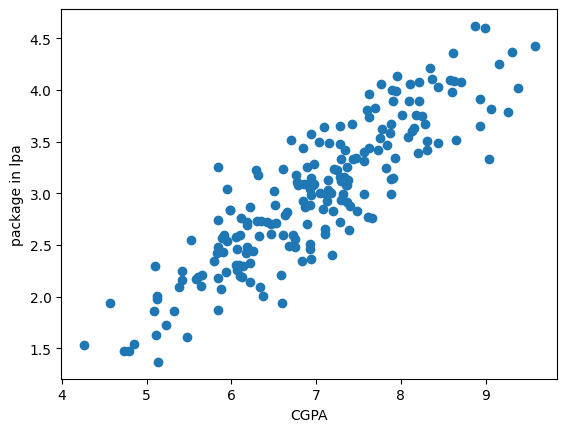

In [7]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("CGPA")
plt.ylabel("package in lpa")

In [9]:
x = df.iloc[:,0]
y =  df.iloc[:,1]

In [11]:
x.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [12]:
y.head()

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [13]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
model.fit(x_train,y_train)

LinearRegression()

In [19]:
x_test.head(5)

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [20]:
y_test.head(5)

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94


In [33]:
model.predict(x_test[0].reshape(-1, 1))

array([3.89111601])

Text(0, 0.5, 'package in LPA')

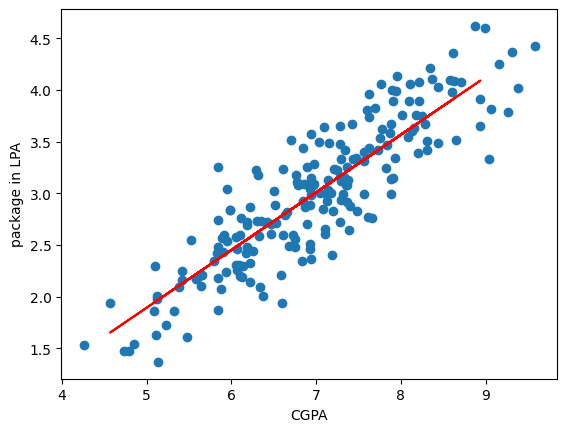

In [37]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(x_test,model.predict(x_test),color="red")
plt.xlabel("CGPA")
plt.ylabel("package in LPA")

In [50]:
b = model.intercept_   # intercept of the line

In [51]:
m = model.coef_    # slope of the line

In [43]:
print(m,b)

-0.8961119222429144 [0.55795197]


In [52]:
# y = mx + b
(m * 8.58) + b


array([3.89111601])

In [34]:
y_pred = model.predict(x_test)

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [56]:
print("MAE", mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2_score",r2_score(y_test,y_pred))

# Adjusted r2 score
r2 = r2_score(y_test,y_pred)
n = x_test.shape[0]
p = 1    # total independent column
print("adjusted_r2_score",1-(1-r2)*(n-1)/(n-p-1))

MAE 0.2884710931878175
MSE 0.12129235313495527
R2_score 0.780730147510384
adjusted_r2_score 0.7749598882343415


In [55]:
x_test.shape

(40, 1)